# Curso de Optimización
## Tarea 6

| Descripción:                         | Fechas               |
|--------------------------------------|----------------------|
| Fecha de publicación del documento:  | **Marzo 25, 2025**   |
| Fecha límite de entrega de la tarea: | **Abril  3, 2025**   |


### Indicaciones

Puede escribir el código de los algoritmos que se piden en una
celda de este notebook o si lo prefiere, escribir las funciones
en un archivo `.py` independiente e importar la funciones para
usarlas en este notebook. Lo importante es que en el notebook
aparezcan los resultados de la pruebas realizadas y que:

- Si se requieren otros archivos para poder reproducir los resultados,
  para mandar la tarea cree un archivo ZIP en el que incluya
  el notebook y los archivos adicionales. 
- Si todos los códigos para que se requieren para reproducir los
  resultados están en el notebook, no hace falta comprimirlo 
  y puede anexar sólo el notebook en la tarea.
- Exportar el notebook a un archivo PDF y anexarlo en la tarea como un archivo independiente.
  **No lo incluya dentro del ZIP**, porque la idea que lo pueda accesar 
  directamente para poner anotaciones y la calificación de cada ejercicio.



---

## Ejercicio 1 (3 puntos)

Considere las siguientes funciones y los puntos $\mathbf{x}_0$:


**Función de Beale :** Para $\mathbf{x}=(x1,x2)$

$$f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2.$$
- $\mathbf{x}_0 = (2,3)$  
   
---

**Función de Himmelblau:** Para $\mathbf{x}=(x_1,x_2)$

$$f(\mathbf{x}) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2. $$
- $\mathbf{x}_0 = (2,4)$

--- 

**Función de Hartmann de dimensión 6 ([Referencia](https://www.sfu.ca/~ssurjano/hart6.html)):** 
Para $\mathbf{x}=(x_1,x_2, ..., x_6)$

$$ f(\mathbf{x}) = -\frac{1}{1.94} \left[ 2.58 + 
\sum_{i=1}^{4} \alpha_i \exp\left(-\sum_{i=1}^{6}a_{ij}(x_j-p_{ij})^2 \right)\right],$$
donde
$$ \alpha = (1.0, 1.2, 3.0, 3.2)$$

$$ \mathbf{A} = [a_{ij}] = \begin{bmatrix}
10   &   3 &   17 & 3.5 & 1.7 &  8 \\
0.05 &  10 &   17 & 0.1 & 8   & 14 \\
3    & 3.5 & 1.7  & 10  & 17  & 8  \\
17   & 8   & 0.05 & 10  & 0.1 & 14
\end{bmatrix},$$

$$
\mathbf{P} = [p_{ij}] = 10^{-4} \begin{bmatrix}
1312 & 1696 & 5569 &  124 & 8283 & 5886 \\
2329 & 4135 & 8307 & 3736 & 1004 & 9991 \\
2348 & 1451 & 3522 & 2883 & 3047 & 6650 \\
4047 & 8828 & 8732 & 5743 & 1091 & 381
\end{bmatrix}.
$$ 

- $\mathbf{x}_0 = (0,0,0,0,0,0)$ 

*NOTA 1:* Esta función tiene 6 óptimos locales. El óptimo global es 
$\mathbf{x}_* = (0.20169, 0.15001,  0.476874, 0.275332, 0.311652, 0.6573)$,
y $f(\mathbf{x}_*) = -3.0424$.

*NOTA 2:* Para esta función necesita calcular el gradiente y programar esta función
para usarla en los siguientes ejercicios.

---

**Función de Rosenbrock:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

$$ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]
\quad n\geq 2.$$
- $\mathbf{x}_0 = (-1.2, 1.0)\in \mathbb{R}^{2}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{200}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{600}$ 

---

1. Calcule y programe el Hessiano de cada función.
2. Escriba una función que recibe como entrada una matriz simétrica. La función hace lo siguiente:

-  Calcula los eigenvalores de la matriz. Puede usar la función `numpy.linalg.eigvalsh()`
   para calcular los eigenvalores.
-  Devuelve el eigenvalor más pequeño y el eigenvalor más grande.

3. Escriba una función que reciba el eigenvalor más pequeño $\lambda_1$ y el eigenvalor 
   más grande $\lambda_n$ de una matriz simétrica. La función imprime $\lambda_1$, $\lambda_n$ y un mensaje de acuerdo a las siguientes condiciones:
   
- Si $\lambda_1>0$, imprima `Matriz definida positiva`.
- Si $\lambda_n<0$, imprima `Matriz definida negativa`.
- Si $\lambda_1<0$ y $\lambda_n>0$, imprima `Matriz indefinida`.

4. Evalúe el Hessiano $\mathbf{H}_0$ en los puntos $\mathbf{x}_0$ dados y use la funciones de los 
   Punto 2 y 3 para indicar si la matriz es definida positiva o no.

### Solución:

#### Beale

In [2]:
import numpy as np

def beale(x):
    return (1.5 - x[0] + x[0] * x[1]) ** 2 + (2.25 - x[0] + x[0] * x[1] ** 2) ** 2 + (2.625 - x[0] + x[0] * x[1] ** 3) ** 2

def beale_grad(x):
    grad = np.zeros(2)
    grad[0] = ((x[1] - 1) * ((8 * x[1]**5 + 8 * x[1]**4 + 16 * x[1]**3 - 8 * x[1] - 24) * x[0] + 21 * x[1]**2 + 39 * x[1] + 51)) / 4
    grad[1] = (x[0] * (24 * x[0] * x[1]**5 + 16 * x[0] * x[1]**3 + (63 - 24 * x[0]) * x[1]**2 + (36 - 8 * x[0]) * x[1] - 8 * x[0] + 12)) / 4

    return grad
    
def beale_hess(x):
    hess = np.zeros((2, 2))
    hess[0, 0] = 2 * (x[1] - 1) * (x[1]**5 + x[1]**4 + 2 * x[1]**3 - x[1] - 3)
    hess[0, 1] = 12*x[0]*x[1]**5 + 8*x[0]*x[1]**3 - 12*x[0]*x[1]**2 - 4*x[0]*x[1] - 4*x[0] + 15.75*x[1]**2 + 9*x[1] + 3
    hess[1, 0] = hess[0, 1]
    hess[1, 1] = (x[0] * (60 * x[0] * x[1]**4 + 24 * x[0] * x[1]**2 + (63 - 24 * x[0]) * x[1] - 4 * x[0] + 18)) / 2
    return hess

#### Himmelblau

In [3]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def himmelblau_grad(x):
    grad = np.zeros(2)
    grad[0] = 4 * x[0] * (x[0]**2 + x[1] - 11) + 2 * (x[0] + x[1]**2 - 7)
    grad[1] = 4 * x[1] * (x[1]**2 + x[0] - 7) + 2 * (x[1] + x[0]**2 - 11)
    return grad

def himmelblau_hess(x):
    hess = np.zeros((2, 2))
    hess[0, 0] = 12 * x[0]**2 + 4 * x[1] - 22
    hess[0, 1] = 4 * (x[0] + x[1])
    hess[1, 0] = hess[0, 1]
    hess[1, 1] = 12 * x[1]**2 + 4 * x[0] - 26
    return hess

#### Hartmann

In [4]:
import numpy as np

alpha = np.array([1.0, 1.2, 3.0, 3.2])

A = np.array([
    [10.0,   3.0, 17.0, 3.5, 1.7,  8.0],
    [0.05, 10.0, 17.0, 0.1, 8.0, 14.0],
    [3.0,   3.5, 1.7, 10.0, 17.0, 8.0],
    [17.0,  8.0, 0.05,10.0, 0.1, 14.0]
])

P = 1e-4 * np.array([
    [1312, 1696, 5569,  124, 8283, 5886],
    [2329, 4135, 8307, 3736, 1004, 9991],
    [2348, 1451, 3522, 2883, 3047, 6650],
    [4047, 8828, 8732, 5743, 1091,  381]
])

def hartmann6(x):
    total = 0.0
    for i in range(4):
        diff = x - P[i]
        exp_arg = -np.sum(A[i] * diff**2)
        total += alpha[i] * np.exp(exp_arg)
    return -(2.58 + total) / 1.94

def hartmann6_grad(x):
    grad = np.zeros(6)
    for i in range(4):
        diff = x - P[i]
        Ai = A[i]
        exp_arg = -np.sum(Ai * diff**2)
        exp_val = np.exp(exp_arg)
        grad_i = -2 * alpha[i] * exp_val * Ai * diff
        grad += grad_i
    return -grad / 1.94

def hartmann6_hess(x):
    hess = np.zeros((6, 6))
    for i in range(4):
        diff = x - P[i]
        Ai = A[i]
        exp_arg = -np.sum(Ai * diff**2)
        exp_val = np.exp(exp_arg)
        for j in range(6):
            for k in range(6):
                if j == k:
                    hess[j, k] += alpha[i] * exp_val * (
                        4 * Ai[j]**2 * diff[j]**2 - 2 * Ai[j]
                    )
                else:
                    hess[j, k] += 4 * alpha[i] * exp_val * Ai[j] * Ai[k] * diff[j] * diff[k]
    return -hess / 1.94

#### Rosenbrock

In [5]:
import numpy as np

def rosenbrock(x):
    return sum(100.0*(x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(len(x) - 1))

def rosenbrock_grad(x):
    grad = np.zeros(len(x))
    grad[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    for i in range(1, len(x) - 1):
        grad[i] = 200 * (x[i] - x[i-1]**2) - 400 * x[i] * (x[i+1] - x[i]**2) - 2 * (1 - x[i])
    grad[-1] = 200 * (x[-1] - x[-2]**2)
    return grad


def rosenbrock_hess(x):
    n = len(x)
    H = np.zeros((n, n))
    for i in range(n - 1):
        H[i, i] += 1200 * x[i]**2 - 400 * x[i+1] + 2
        H[i, i+1] += -400 * x[i]
        H[i+1, i] += -400 * x[i]
        H[i+1, i+1] += 200
    return H

#### Eigenvalores menor y mayor de matriz simetrica

In [6]:
def min_max_eigenvals(H):
    eigenv = np.linalg.eigvals(H)
    return np.min(eigenv), np.max(eigenv)

#### Tipo de matriz

In [7]:
def which_definite(lambda1, lambdan):
    if lambda1>0:
        return "Positive definite"
    elif lambdan<0:
        return "Negative definite"
    elif lambda1<0 and lambdan>0:
        return "Indefinite"
    else:
        return "Semi-definite"

In [54]:
# Beale
x0 = np.array([2,3])
lambda1, lambdan = min_max_eigenvals(beale_hess(x0))
print(f"Beale: H({x0[0]},{x0[1]}) is ", which_definite(lambda1, lambdan))

# Himmelblau
x0 = np.array([2,4])
lambda1, lambdan = min_max_eigenvals(himmelblau_hess(x0))
print(f"Himmelblau: H({x0[0]},{x0[1]}) is ", which_definite(lambda1, lambdan))

# Hartmann6
x0 = np.zeros(6)
lambda1, lambdan = min_max_eigenvals(hartmann6_hess(x0))
print(f"Hartmann6: H({x0[0]},{x0[1]},{x0[2]},{x0[3]},{x0[4]},{x0[5]}) is ", which_definite(lambda1, lambdan))

# Rosenbrock
x0 = np.array([-1.2, 1])
lambda1, lambdan = min_max_eigenvals(rosenbrock_hess(x0))
print(f"Rosenbrock: H({x0[0]},{x0[1]}) is ", which_definite(lambda1, lambdan))

x0 = np.ones(200)
x0[0] = -1.2
x0[-2] = -1.2
lambda1, lambdan = min_max_eigenvals(rosenbrock_hess(x0))
print(f"Rosenbrock: H({x0[0]},{x0[1]},...,{x0[198]},{x0[199]}) is ", which_definite(lambda1, lambdan))

x0 = np.ones(600)
x0[0] = -1.2
x0[-2] = -1.2
lambda1, lambdan = min_max_eigenvals(rosenbrock_hess(x0))
print(f"Rosenbrock: H({x0[0]},{x0[1]},...,{x0[598]},{x0[599]}) is ", which_definite(lambda1, lambdan))

Beale: H(2,3) is  Indefinite
Himmelblau: H(2,4) is  Positive definite
Hartmann6: H(0.0,0.0,0.0,0.0,0.0,0.0) is  Indefinite
Rosenbrock: H(-1.2,1.0) is  Positive definite
Rosenbrock: H(-1.2,1.0,...,-1.2,1.0) is  Positive definite
Rosenbrock: H(-1.2,1.0,...,-1.2,1.0) is  Positive definite


---


```



``` 

## Ejercicio 2 (4 puntos)

Programar el método de Newton con tamaño de paso $\alpha_k$ inexacto usando el algoritmo de 
backtracking usando la condición de descenso suficiente.

> La función que implementa el método de Newton recibe como parámetros:
> - la función objetivo $f: \mathbb{R}^n \rightarrow \mathbb{R}$,
> - el gradiente $g(\mathbf{x})$ de la función objetivo, 
> - la Hessiana $H(\mathbf{x})$ de la función $f$, 
> - el punto inicial $\mathbf{x}_0$,
> - un número máximo de iteraciones $N$, 
> - la  tolerancia $\tau>0$, y
> - los parámetros $\alpha_{ini}, c_1$, $\rho$ y el número máximo de iteraciones $N_b$ para el algoritmo de backtracking.
> 
> Fijar $m=0$.
> 
> Para $k=0, 1, ..., N-1$ repetir los siguientes pasos:
> 1. Calcular el gradiente $\mathbf{g}_k$ en el punto $\mathbf{x}_k$:
>    $\;\mathbf{g}_k = g(\mathbf{x}_k)$.
> 2. Si $\|\mathbf{g}_k\| < \tau$,  hacer  $res=1$ y terminar el ciclo. 
> 3. Si no se cumple el criterio de paro, calcular la Hessiana  en el punto 
>    $\mathbf{x}_k$: $\mathbf{H}_k=H(\mathbf{x}_k)$.
> 4. Intentar calcular la factorización de Cholesky de $\mathbf{H}_k$.
>    Si la factorización es exitosa, $\mathbf{H}_k=\mathbf{L}\mathbf{L}^\top$, 
>    resolver el sistema de ecuaciones 
>    $\mathbf{L}\mathbf{L}^\top \mathbf{p}_k = -\mathbf{g}_k$ para obtener 
>    la dirección de descenso $\mathbf{p}_k$.
> 5. Si falla el cálculo de la factorización, definir la dirección de descenso como 
>    $\mathbf{p}_k = -\mathbf{g}_k$ y hacer $m = m+1$.
> 6. Calcular el tamaño de paso $\alpha_k$ usando el algoritmo de backtracking con la
>    condición de descenso suficiente. 
> 7. Calcular el siguiente punto de la secuencia como
>    $\mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k \mathbf{p}_k$.
> 
>  Devolver el punto $\mathbf{x}_k$, $\;\mathbf{g}_k$, $\;k$, $\;m$ y $\;res$.
>
> .


**Nota:** Para calcular la factorización de Cholesky y resolver el sistema de ecuaciones
puede usar las funciones `scipy.linalg.cho_factor` y `scipy.linalg.cho_solve`.
Si la matriz no es definida positiva, la función `cho_factor` lanza la excepción
`scipy.linalg.LinAlgError`. Puede manejar este error mediante una excepción en la que
se defina la dirección de descenso como $-\mathbf{g}_k$.



1. Programe la función que implementa el algoritmo del método de Newton.
   Si la dimensión de las variables es 2, almacene 
   los puntos $\mathbf{x}_0, \mathbf{x}_1,...,\mathbf{x}_k$ que genera el algoritmo
   y haga que la función devuelva esta lista para usarlos para graficar la trayectoria.
2. Pruebe el algoritmo con las funciones del Ejercicio 1 usando los puntos iniciales
   $\mathbf{x_0}$ indicados, el número de iteraciones máximas $N=10000$ y la tolerancia 
   $\tau = \sqrt{n\epsilon_m}$, donde $\epsilon_m$ es el épsilon de máquina.
   Para el algoritmo del backtraking use $\alpha_{ini}=1$, $c_1=0.1$, $\rho=0.6$ y el máximo de iteraciones $N_b=100$.

   Imprima los valores siguientes:
- $f(\mathbf{x}_0)$.
- Imprimir el número de iteraciones $k$.
- Imprimir el número $m$ de veces en que $\mathbf{H}_k$ no fue definida positiva.
- El valor de $res$.
- La norma $\|\mathbf{g}_k\|$.
- Si $n<=6$, imprimir $\mathbf{x}_k$. En caso contrario, imprimir las primeras y
  las últimas 3 componentes de  $\mathbf{x}_k$.
- $f(\mathbf{x}_k)$.

   Además, si la dimensión de la variable es $n=2$, grafique los contornos de nivel de la función
   y la trayectoria  definida por los puntos $\mathbf{x}_0, \mathbf{x}_1,...,\mathbf{x}_k$.
   
3. Revise el valor del contador $m$ y escriba un comentario sobre si el algoritmo
   se comporta más como el método de descenso máximo o como el método de Newton, y la necesidad de modificar la matriz Hessiana.
   
### Solución:

In [8]:
from scipy.linalg import cho_factor, cho_solve, LinAlgError
def backtracking_alpha(f, grad, X, p, alpha=1, c1=0.1, rho=0.6, Nb=100):
    g = grad(X)
    for i in range(Nb):
        if f(X + alpha * p) <= f(X) + c1 * alpha * g.T @ p:
            break
        alpha *= rho
    return alpha

def newton(f, grad, hess, x0, N=10000, tau=1e-6):
    m = 0
    res = 0
    xk = x0
    history = []

    if len(x0) <= 6:
        history.append(x0)
    else:
        history.append(np.concatenate([x0[:3],x0[-3:]]))

    for k in range(N):
        gk = grad(xk)
        if np.linalg.norm(gk) < tau:
            res = 1
            break
        Hk = hess(xk)
        try:
            L, lower = cho_factor(Hk)
            pk = cho_solve((L, lower), -gk)
        except LinAlgError:
            pk = -gk
            m += 1
        alphak = backtracking_alpha(f, grad, xk, pk)
        xk = xk + alphak * pk
        if len(x0) <= 6:
            history.append(xk)
        else:
            history.append(np.concatenate([xk[:3],xk[-3:]]))
    return xk, gk, k, m, res, history

In [9]:
import matplotlib.pyplot as plt
def plot_trajectory(f, trajectory, levels=100, neigh=1):
    trajectory = np.array(trajectory)
    x_vals = trajectory[:, 0]
    y_vals = trajectory[:, 1]

    # Crear malla para contorno
    x = np.linspace(min(x_vals) - neigh, max(x_vals) + neigh, 400)
    #x = np.linspace(-4.5, 4.5, 400)
    y = np.linspace(min(y_vals) - neigh, max(y_vals) + neigh, 400)
    #y = np.linspace(-4.5, 4.5, 400)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[f(np.array([xi, yi])) for xi, yi in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])

    # Dibujar contornos
    plt.contour(X, Y, Z, levels=levels)
    # Dibujar trayectoria
    plt.plot(x_vals, y_vals, color='red', label='Trayectoria de Newton')
    plt.scatter(x_vals[0], y_vals[0], color='red', label='Punto inicial')
    plt.scatter(x_vals[-1], y_vals[-1], marker='s', color='red', label='Punto final')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Método de Newton - Contornos y Trayectoria')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()


#### Beale

f(2,3) = 4.6489097853774294e-17
k =  9
m =  1
res =  1
xk =  [2.99999999 0.5       ]
||g_k|| = 4.2398298937647866e-08
f(3.00,0.50) = 0.00


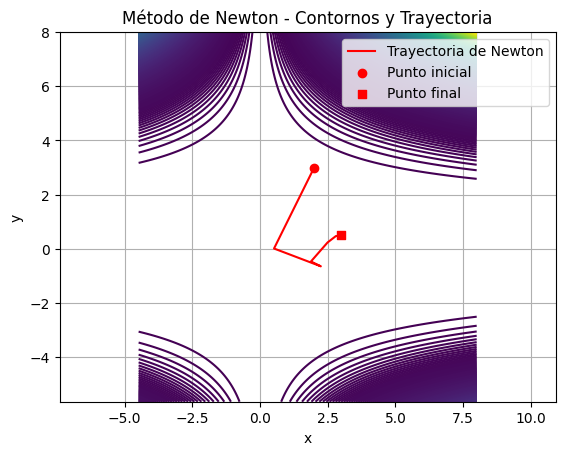

In [93]:
x0 = np.array([2,3])
xk, gk, k, m, res, history = newton(beale, beale_grad, beale_hess, x0)

print(f"f({x0[0]},{x0[1]}) = {beale(xk)}")
print("k = ", k)
print("m = ", m)
print("res = ", res)
print("xk = ", xk)
print("||g_k|| = " + str(np.linalg.norm(gk)))
print(f"f({xk[0]:.2f},{xk[1]:.2f}) = {beale(xk):.2f}")

plot_trajectory(beale,history, 1000, 5)

#### Himmelblau

f(2,4) = 1.6736559929589135e-15
k =  14
m =  0
res =  1
xk =  [2.99999999 2.        ]
||g_k|| = 4.564218893402612e-07
f(3.00,2.00) = 0.00


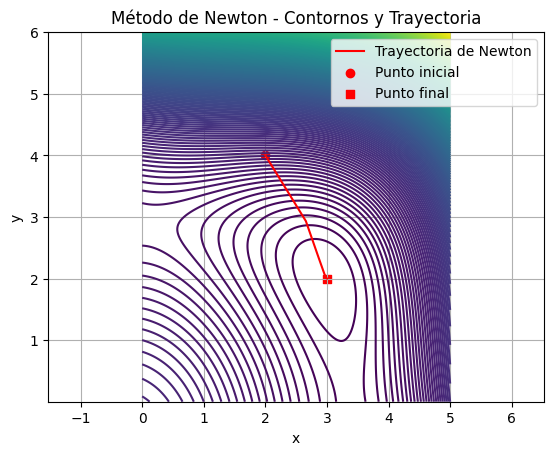

In [94]:
x0 = np.array([2,4])
xk, gk, k, m, res, history = newton(himmelblau, himmelblau_grad, himmelblau_hess, x0)

print(f"f({x0[0]},{x0[1]}) = {himmelblau(xk)}")
print("k = ", k)
print("m = ", m)
print("res = ", res)
print("xk = ", xk)
print("||g_k|| = " + str(np.linalg.norm(gk)))
print(f"f({xk[0]:.2f},{xk[1]:.2f}) = {himmelblau(xk):.2f}")

plot_trajectory(himmelblau,history, 200, 2)

#### Hartmann

In [57]:
x0 = np.zeros(6)
xk, gk, k, m, res, history = newton(hartmann6, hartmann6_grad, hartmann6_hess, x0)

print(f"f(xk) = {hartmann6(xk)}")
print("k = ", k)
print("m = ", m)
print("res = ", res)
print("xk = ", "[", round(xk[0], 2), round(xk[1], 2), round(xk[2], 2), ", ...,", round(xk[-3], 2), round(xk[-2], 2), round(xk[-1], 2), "]")
print("||g_k|| = " + str(np.linalg.norm(gk)))
print(f"f(xk) = {hartmann6(xk):.2f}")

f(xk) = -3.0424577378430313
k =  9
m =  5
res =  1
xk =  [ 0.2 0.15 0.48 , ..., 0.28 0.31 0.66 ]
||g_k|| = 5.85420284291822e-07
f(xk) = -3.04


### Rosenbrock

f(-1.2,1.0) = 3.669529481674608e-26
k =  21
m =  0
res =  1
xk =  [1. 1.]
||g_k|| = 1.7127341189325655e-13
f(xk) = 0.00


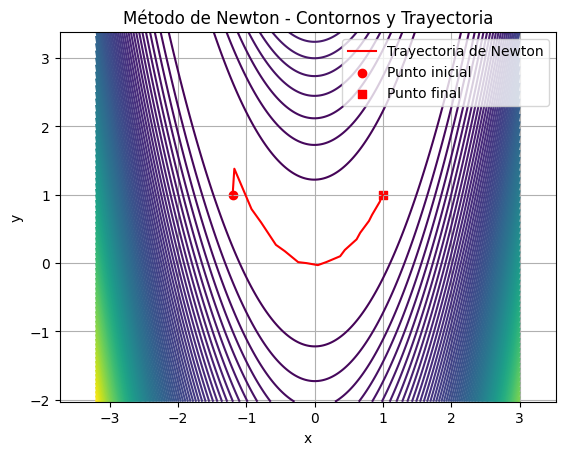

In [95]:
x0 = np.array([-1.2, 1])
xk, gk, k, m, res, history = newton(rosenbrock, rosenbrock_grad, rosenbrock_hess, x0)

print(f"f({x0[0]},{x0[1]}) = {rosenbrock(xk)}")
print("k = ", k)
print("m = ", m)
print("res = ", res)
print("xk = ", xk)
print("||g_k|| = " + str(np.linalg.norm(gk)))
print(f"f(xk) = {rosenbrock(xk):.2f}")

plot_trajectory(rosenbrock,history, 100, 2)

In [59]:
x0 = np.ones(200)
x0[0] = -1.2
x0[-2] = -1.2
xk, gk, k, m, res, history = newton(rosenbrock, rosenbrock_grad, rosenbrock_hess, x0)

print(f"f(xk) = {rosenbrock(xk)}")
print("k = ", k)
print("m = ", m)
print("res = ", res)
print("xk = ", "[", round(xk[0], 2), round(xk[1], 2), round(xk[2], 2), ", ...,", round(xk[-3], 2), round(xk[-2], 2), round(xk[-1], 2), "]")
print("||g_k|| = " + str(np.linalg.norm(gk)))
print(f"f(xk) = {rosenbrock(xk):.2f}")

f(xk) = 3.9866238543009334
k =  15
m =  0
res =  1
xk =  [ -0.99 1.0 1.0 , ..., 1.0 1.0 1.0 ]
||g_k|| = 4.650441918814107e-07
f(xk) = 3.99


In [60]:
x0 = np.ones(600)
x0[0] = -1.2
x0[-2] = -1.2
xk, gk, k, m, res, history = newton(rosenbrock, rosenbrock_grad, rosenbrock_hess, x0)

print(f"f(xk) = {rosenbrock(xk)}")
print("k = ", k)
print("m = ", m)
print("res = ", res)
print("xk = ", "[", round(xk[0], 2), round(xk[1], 2), round(xk[2], 2), ", ...,", round(xk[-3], 2), round(xk[-2], 2), round(xk[-1], 2), "]")
print("||g_k|| = " + str(np.linalg.norm(gk)))
print(f"f(xk) = {rosenbrock(xk):.2f}")

f(xk) = 3.9866238543009334
k =  15
m =  0
res =  1
xk =  [ -0.99 1.0 1.0 , ..., 1.0 1.0 1.0 ]
||g_k|| = 4.650441918814107e-07
f(xk) = 3.99


El unico caso en el que el contador $m$ es comparable con el numero de iteraciones es en el de la funcion de Hartmann, lo que significa que, en general, el algoritmo se comporta mayormente como el metodo de Newton, de manera que no existe una gran necesidad de modificar la matriz hessiana, puesto que la gran mayoria de las veces satisface las condiciones requeridas.

## Ejercicio 3 (3 puntos)

Modifique el algoritmo del método de Newton del Ejercicio 2 que implementa el algoritmo del
método de Newton reemplazando el Paso 4 (Intentar calcular la factorización de Cholesky)
y el Paso 5 (Si falla el cálculo de la factorización) para que quede de la siguiente manera:  


> La función que implementa el método de Newton recibe como parámetros:
> - la función objetivo $f: \mathbb{R}^n \rightarrow \mathbb{R}$,
> - el gradiente $g(\mathbf{x})$ de la función objetivo, 
> - la Hessiana $H(\mathbf{x})$ de la función $f$, 
> - el punto inicial $\mathbf{x}_0$,
> - un número máximo de iteraciones $N$, 
> - la  tolerancia $\tau>0$, 
> - **un incremento** $\delta>0$,y
> - los parámetros $\alpha_{ini}, c_1$, $\rho$ y el número máximo de iteraciones $N_b$ para el algoritmo de backtracking.
>
> Definir $\epsilon = \sqrt{\epsilon_m}$.
> 
> Para $k=0, 1, ..., N-1$ repetir los siguientes pasos:
> 1. Calcular el gradiente $\mathbf{g}_k = g(\mathbf{x}_k)$ en el punto $\mathbf{x}_k$.
> 2. Si $\|\mathbf{g}_k\| < \tau$,  hacer  $res=1$ y terminar el ciclo. 
> 3. Si no se cumple el criterio de paro, calcular la Hessiana  $\mathbf{H}_k=H(\mathbf{x}_k)$ en $\mathbf{x}_k$.
> 4. Usar la función del Punto 2 del Ejercicio 1 para obtener el eigenvalor
>    más pequeño $\lambda_1$ de $\mathbf{H}_k$. 
> 5. Si $\lambda_1<\epsilon$, modificar la Hessiana sumando $\delta + |\lambda_1|$ a los elementos
>    de la diagonal. Es decir se reemplaza  $\mathbf{H}_k$ por la matriz 
>    $\mathbf{H}_k+(\delta + |\lambda_1|)\mathbf{I}$, donde $\mathbf{I}$ es la matriz identidad, lo cual
>    hace que todos los eigenvalores de la matriz sean positivos y mayores que $\delta$.
> 6. Calcular la factorización de Cholesky $\mathbf{L}\mathbf{L}^\top$ de la matriz modificada.
> 7. Resolver el sistema de ecuaciones $\mathbf{L}\mathbf{L}^\top \mathbf{p}_k = -\mathbf{g}_k$ para obtener 
>    la dirección de descenso $\mathbf{p}_k$.
> 8. Calcular el tamaño de paso $\alpha_k$ usando el algoritmo de backtracking con la
>    condición de descenso suficiente. 
> 9. Calcular $\mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k \mathbf{p}_k$.
> 
> Devolver el punto $\mathbf{x}_k$, $\;\mathbf{g}_k$, $\;k$ y $\;res$.
> 
> .

1. Programe la función que implementa el algoritmo anterior.
2. Repita las pruebas del Ejercicio 2 usando $\delta=0.001$ y $\delta=10.0$.
3. Repita la prueba para la función de Rosenbrock con $\delta=100.0$.
4. En este algoritmo se tiene un costo adicional por el cálculo de los eigenvalores de la matriz Hessiana,
   el cual se incrementa conforme aumenta el valor de $n$. Explique si conviene hacer este cambio
   y qué tan sensible es el algoritmo al cambiar el valor de $\delta$.

### Solución:

In [ ]:
def newton_modified(f, grad, hess, x0, N=10000, tau=1e-6, delta=0.001):
    res = 0
    xk = x0
    history = []

    if len(x0) <= 6:
        history.append(x0)
    else:
        history.append(np.concatenate([x0[:3],x0[-3:]]))

    for k in range(N):
        gk = grad(xk)
        if np.linalg.norm(gk) < tau:
            res = 1
            break
        Hk = hess(xk)
        lambda1, lambdan = min_max_eigenvals(Hk)
        if lambda1 < tau:
            Hk += (delta + abs(lambda1)) * np.eye(len(x0))
            lambda1, lambdan = min_max_eigenvals(Hk)
        L, lower = cho_factor(Hk)
        pk = cho_solve((L, lower), -gk)
        alphak = backtracking_alpha(f, grad, xk, pk)
        xk = xk + alphak * pk
        if len(x0) <= 6:
            history.append(xk)
        else:
            history.append(np.concatenate([xk[:3],xk[-3:]]))
    return xk, gk, k, res, history

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def plot_trajectories(f, trajectories, titles, levels=100, neigh=1):
    # Extraer todos los valores x e y de todas las trayectorias para definir límites
    all_x = np.concatenate([np.array(t)[:, 0] for t in trajectories])
    all_y = np.concatenate([np.array(t)[:, 1] for t in trajectories])

    # Crear la malla para contorno con límites generales
    x = np.linspace(np.min(all_x) - neigh, np.max(all_x) + neigh, 400)
    y = np.linspace(np.min(all_y) - neigh, np.max(all_y) + neigh, 400)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[f(np.array([xi, yi])) for xi, yi in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])

    n_traj = len(trajectories)
    plt.figure(figsize=(6 * n_traj, 5))

    for i, traj in enumerate(trajectories):
        traj = np.array(traj)
        x_vals = traj[:, 0]
        y_vals = traj[:, 1]

        plt.subplot(1, n_traj, i + 1)

        # Dibujar contornos
        plt.contour(X, Y, Z, levels=levels)

        # Dibujar trayectoria
        plt.plot(x_vals, y_vals, color='red', label='Trayectoria de Newton')
        plt.scatter(x_vals[0], y_vals[0], color='green', label='Punto inicial')
        plt.scatter(x_vals[-1], y_vals[-1], marker='s', color='blue', label='Punto final')

        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(titles[i])
        plt.legend()
        plt.grid(True)
        plt.axis('equal')

    plt.tight_layout()
    plt.show()

### $\delta=0.001$ y $\delta=10.0$
#### Beale

------------------------------
delta = 0.001
f(2,3) = 7.983308753208869e-25
k =  10
res =  1
xk =  [3.  0.5]
||g_k|| = 2.229197079843102e-12
f(3.00,0.50) = 0.00
------------------------------
delta = 10.0
f(2,3) = 2.504975516634019e-15
k =  14
res =  1
xk =  [2.99999988 0.49999997]
||g_k|| = 1.2641903191209193e-07
f(3.00,0.50) = 0.00


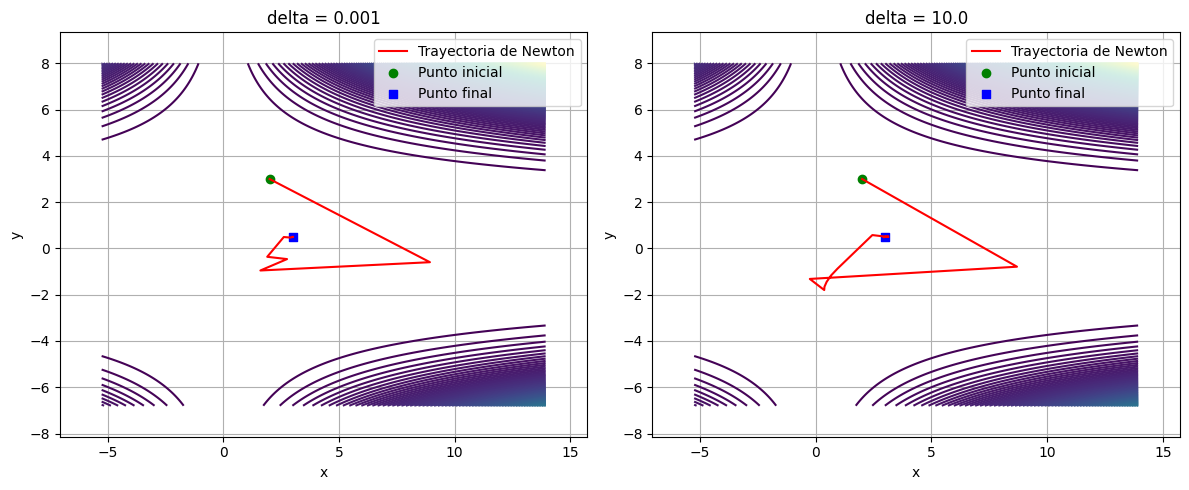

In [25]:
titles = ["delta = 0.001", "delta = 10.0"]
x0 = np.array([2,3])
xk_001, gk_001, k_001, res_001, history_001 = newton_modified(beale, beale_grad, beale_hess, x0)
xk_10, gk_10, k_10, res_10, history_10 = newton_modified(beale, beale_grad, beale_hess, x0, delta=10.0)

print("-"*30)
print("delta = 0.001")
print(f"f({x0[0]},{x0[1]}) = {beale(xk_001)}")
print("k = ", k_001)
print("res = ", res_001)
print("xk = ", xk_001)
print("||g_k|| = " + str(np.linalg.norm(gk_001)))
print(f"f({xk_001[0]:.2f},{xk_001[1]:.2f}) = {beale(xk_001):.2f}")

print("-"*30)
print("delta = 10.0")
print(f"f({x0[0]},{x0[1]}) = {beale(xk_10)}")
print("k = ", k_10)
print("res = ", res_10)
print("xk = ", xk_10)
print("||g_k|| = " + str(np.linalg.norm(gk_10)))
print(f"f({xk_10[0]:.2f},{xk_10[1]:.2f}) = {beale(xk_10):.2f}")

plot_trajectories(beale,[history_001, history_10], titles, 200, 5)

#### Himmelblau

------------------------------
delta = 0.001
f(2,4) = 1.6736559929589135e-15
k =  14
res =  1
xk =  [2.99999999 2.        ]
||g_k|| = 4.564218893402612e-07
f(3.00,2.00) = 0.00
------------------------------
delta = 10.0
f(2,4) = 1.6736559929589135e-15
k =  14
res =  1
xk =  [2.99999999 2.        ]
||g_k|| = 4.564218893402612e-07
f(3.00,2.00) = 0.00


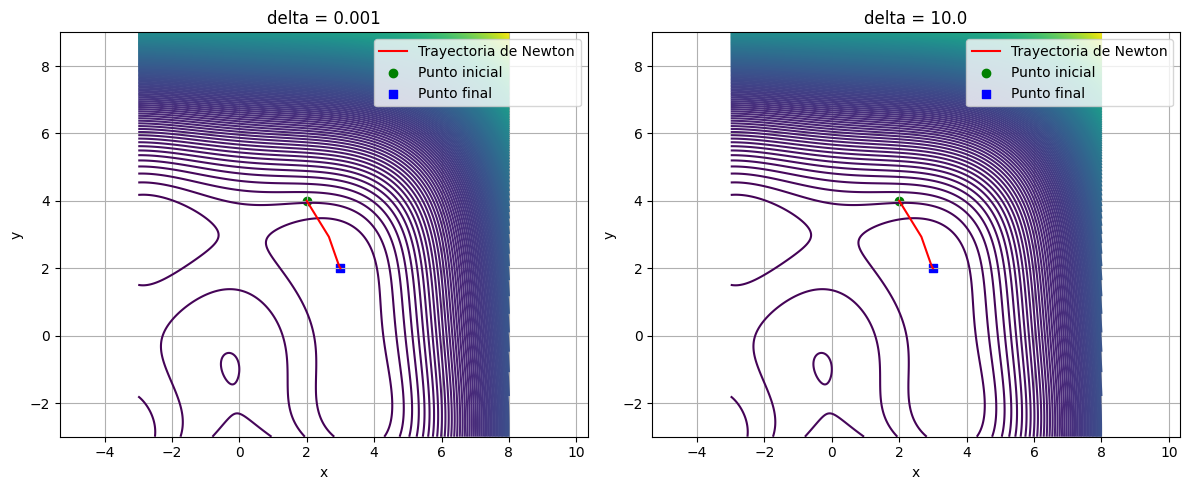

In [26]:
x0 = np.array([2,4])
xk_001, gk_001, k_001, res_001, history_001 = newton_modified(himmelblau, himmelblau_grad, himmelblau_hess, x0)
xk_10, gk_10, k_10, res_10, history_10 = newton_modified(himmelblau, himmelblau_grad, himmelblau_hess, x0, delta=10.0)

print("-"*30)
print("delta = 0.001")
print(f"f({x0[0]},{x0[1]}) = {himmelblau(xk_001)}")
print("k = ", k_001)
print("res = ", res_001)
print("xk = ", xk_001)
print("||g_k|| = " + str(np.linalg.norm(gk_001)))
print(f"f({xk_001[0]:.2f},{xk_001[1]:.2f}) = {himmelblau(xk_001):.2f}")

print("-"*30)
print("delta = 10.0")
print(f"f({x0[0]},{x0[1]}) = {himmelblau(xk_10)}")
print("k = ", k_10)
print("res = ", res_10)
print("xk = ", xk_10)
print("||g_k|| = " + str(np.linalg.norm(gk_10)))
print(f"f({xk_10[0]:.2f},{xk_10[1]:.2f}) = {himmelblau(xk_10):.2f}")

plot_trajectories(himmelblau,[history_001, history_10], titles, 200, 5)

#### Hartmann

In [23]:
x0 = np.zeros(6)
xk_001, gk_001, k_001, res_001, history_001 = newton_modified(hartmann6, hartmann6_grad, hartmann6_hess, x0)
xk_10, gk_10, k_10, res_10, history_10 = newton_modified(hartmann6, hartmann6_grad, hartmann6_hess, x0, delta=10)

print("-"*30)
print("delta = 0.001")
print(f"f({x0[0]},{x0[1]}) = {hartmann6(xk_001)}")
print("k = ", k_001)
print("res = ", res_001)
print("xk = ", xk_001)
print("||g_k|| = " + str(np.linalg.norm(gk_001)))
print(f"f({xk_001[0]:.2f},{xk_001[1]:.2f}) = {hartmann6(xk_001):.2f}")

print("-"*30)
print("delta = 10.0")
print(f"f({x0[0]},{x0[1]}) = {hartmann6(xk_10)}")
print("k = ", k_10)
print("res = ", res_10)
print("xk = ", xk_10)
print("||g_k|| = " + str(np.linalg.norm(gk_10)))
print(f"f({xk_10[0]:.2f},{xk_10[1]:.2f}) = {hartmann6(xk_10):.2f}")

------------------------------
delta = 0.001
f(0.0,0.0) = -3.042457737843049
k =  8
res =  1
xk =  [0.20168951 0.15001069 0.47687397 0.27533243 0.31165162 0.65730053]
||g_k|| = 5.232071868246903e-10
f(0.20,0.15) = -3.04
------------------------------
delta = 10.0
f(0.0,0.0) = -3.042457737843018
k =  26
res =  1
xk =  [0.2016895  0.15001069 0.47687405 0.27533242 0.31165162 0.65730053]
||g_k|| = 7.765464262685742e-07
f(0.20,0.15) = -3.04


### Rosenbrock

------------------------------
delta = 0.001
f(-1.2,1.0) = 3.669529481674608e-26
k =  21
res =  1
xk =  [1. 1.]
||g_k|| = 1.7127341189325655e-13
f(1.00,1.00) = 0.00
------------------------------
delta = 10.0
f(-1.2,1.0) = 3.669529481674608e-26
k =  21
res =  1
xk =  [1. 1.]
||g_k|| = 1.7127341189325655e-13
f(1.00,1.00) = 0.00


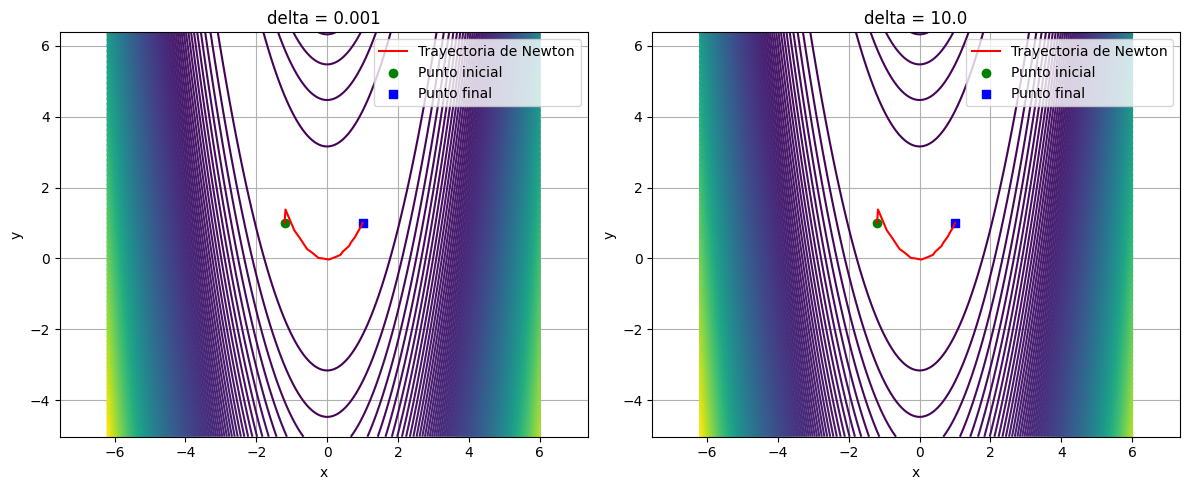

In [27]:
x0 = np.array([-1.2, 1])
xk_001, gk_001, k_001, res_001, history_001 = newton_modified(rosenbrock, rosenbrock_grad, rosenbrock_hess, x0)
xk_10, gk_10, k_10, res_10, history_10 = newton_modified(rosenbrock, rosenbrock_grad, rosenbrock_hess, x0, delta=10.0)

print("-"*30)
print("delta = 0.001")
print(f"f({x0[0]},{x0[1]}) = {rosenbrock(xk_001)}")
print("k = ", k_001)
print("res = ", res_001)
print("xk = ", xk_001)
print("||g_k|| = " + str(np.linalg.norm(gk_001)))
print(f"f({xk_001[0]:.2f},{xk_001[1]:.2f}) = {rosenbrock(xk_001):.2f}")

print("-"*30)
print("delta = 10.0")
print(f"f({x0[0]},{x0[1]}) = {rosenbrock(xk_10)}")
print("k = ", k_10)
print("res = ", res_10)
print("xk = ", xk_10)
print("||g_k|| = " + str(np.linalg.norm(gk_10)))
print(f"f({xk_10[0]:.2f},{xk_10[1]:.2f}) = {rosenbrock(xk_10):.2f}")

plot_trajectories(rosenbrock,[history_001, history_10], titles, 200, 5)

In [30]:
x0 = np.ones(200)
x0[0] = -1.2
x0[-2] = -1.2
xk_001, gk_001, k_001, res_001, history_001 = newton_modified(rosenbrock, rosenbrock_grad, rosenbrock_hess, x0)
xk_10, gk_10, k_10, res_10, history_10 = newton_modified(rosenbrock, rosenbrock_grad, rosenbrock_hess, x0, delta=10.0)

print("-"*30)
print("delta = 0.001")
print(f"f({x0[0]},{x0[1]}) = {rosenbrock(xk_001)}")
print("k = ", k_001)
print("res = ", res_001)
print("xk = ", "[", round(xk_001[0], 2), round(xk_001[1], 2), round(xk_001[2], 2), ", ...,", round(xk_001[-3], 2), round(xk_001[-2], 2), round(xk_001[-1], 2), "]")
print("||g_k|| = " + str(np.linalg.norm(gk_001)))
print(f"f({xk_001[0]:.2f},{xk_001[1]:.2f}) = {rosenbrock(xk_001):.2f}")

print("-"*30)
print("delta = 10.0")
print(f"f({x0[0]},{x0[1]}) = {rosenbrock(xk_10)}")
print("k = ", k_10)
print("res = ", res_10)
print("xk = ", "[", round(xk_10[0], 2), round(xk_10[1], 2), round(xk_10[2], 2), ", ...,", round(xk_10[-3], 2), round(xk_10[-2], 2), round(xk_10[-1], 2), "]")
print("||g_k|| = " + str(np.linalg.norm(gk_10)))
print(f"f({xk_10[0]:.2f},{xk_10[1]:.2f}) = {rosenbrock(xk_10):.2f}")

------------------------------
delta = 0.001
f(-1.2,1.0) = 3.9866238543009334
k =  15
res =  1
xk =  [ -0.99 1.0 1.0 , ..., 1.0 1.0 1.0 ]
||g_k|| = 4.650441918814107e-07
f(-0.99,1.00) = 3.99
------------------------------
delta = 10.0
f(-1.2,1.0) = 3.9866238543009334
k =  15
res =  1
xk =  [ -0.99 1.0 1.0 , ..., 1.0 1.0 1.0 ]
||g_k|| = 4.650441918814107e-07
f(-0.99,1.00) = 3.99


In [31]:
x0 = np.ones(600)
x0[0] = -1.2
x0[-2] = -1.2
xk_001, gk_001, k_001, res_001, history_001 = newton_modified(rosenbrock, rosenbrock_grad, rosenbrock_hess, x0)
xk_10, gk_10, k_10, res_10, history_10 = newton_modified(rosenbrock, rosenbrock_grad, rosenbrock_hess, x0, delta=10.0)

print("-"*30)
print("delta = 0.001")
print(f"f({x0[0]},{x0[1]}) = {rosenbrock(xk_001)}")
print("k = ", k_001)
print("res = ", res_001)
print("xk = ", "[", round(xk_001[0], 2), round(xk_001[1], 2), round(xk_001[2], 2), ", ...,", round(xk_001[-3], 2), round(xk_001[-2], 2), round(xk_001[-1], 2), "]")
print("||g_k|| = " + str(np.linalg.norm(gk_001)))
print(f"f({xk_001[0]:.2f},{xk_001[1]:.2f}) = {rosenbrock(xk_001):.2f}")

print("-"*30)
print("delta = 10.0")
print(f"f({x0[0]},{x0[1]}) = {rosenbrock(xk_10)}")
print("k = ", k_10)
print("res = ", res_10)
print("xk = ", "[", round(xk_10[0], 2), round(xk_10[1], 2), round(xk_10[2], 2), ", ...,", round(xk_10[-3], 2), round(xk_10[-2], 2), round(xk_10[-1], 2), "]")
print("||g_k|| = " + str(np.linalg.norm(gk_10)))
print(f"f({xk_10[0]:.2f},{xk_10[1]:.2f}) = {rosenbrock(xk_10):.2f}")

------------------------------
delta = 0.001
f(-1.2,1.0) = 3.9866238543009334
k =  15
res =  1
xk =  [ -0.99 1.0 1.0 , ..., 1.0 1.0 1.0 ]
||g_k|| = 4.650441918814107e-07
f(-0.99,1.00) = 3.99
------------------------------
delta = 10.0
f(-1.2,1.0) = 3.9866238543009334
k =  15
res =  1
xk =  [ -0.99 1.0 1.0 , ..., 1.0 1.0 1.0 ]
||g_k|| = 4.650441918814107e-07
f(-0.99,1.00) = 3.99


### $\delta=100.0$

------------------------------
delta = 0.001
f(-1.2,1.0) = 3.669529481674608e-26
k =  21
res =  1
xk =  [1. 1.]
||g_k|| = 1.7127341189325655e-13
f(1.00,1.00) = 0.00
------------------------------
delta = 10.0
f(-1.2,1.0) = 3.669529481674608e-26
k =  21
res =  1
xk =  [1. 1.]
||g_k|| = 1.7127341189325655e-13
f(1.00,1.00) = 0.00
------------------------------
delta = 100.0
f(-1.2,1.0) = 3.669529481674608e-26
k =  21
res =  1
xk =  [1. 1.]
||g_k|| = 1.7127341189325655e-13
f(1.00,1.00) = 0.00


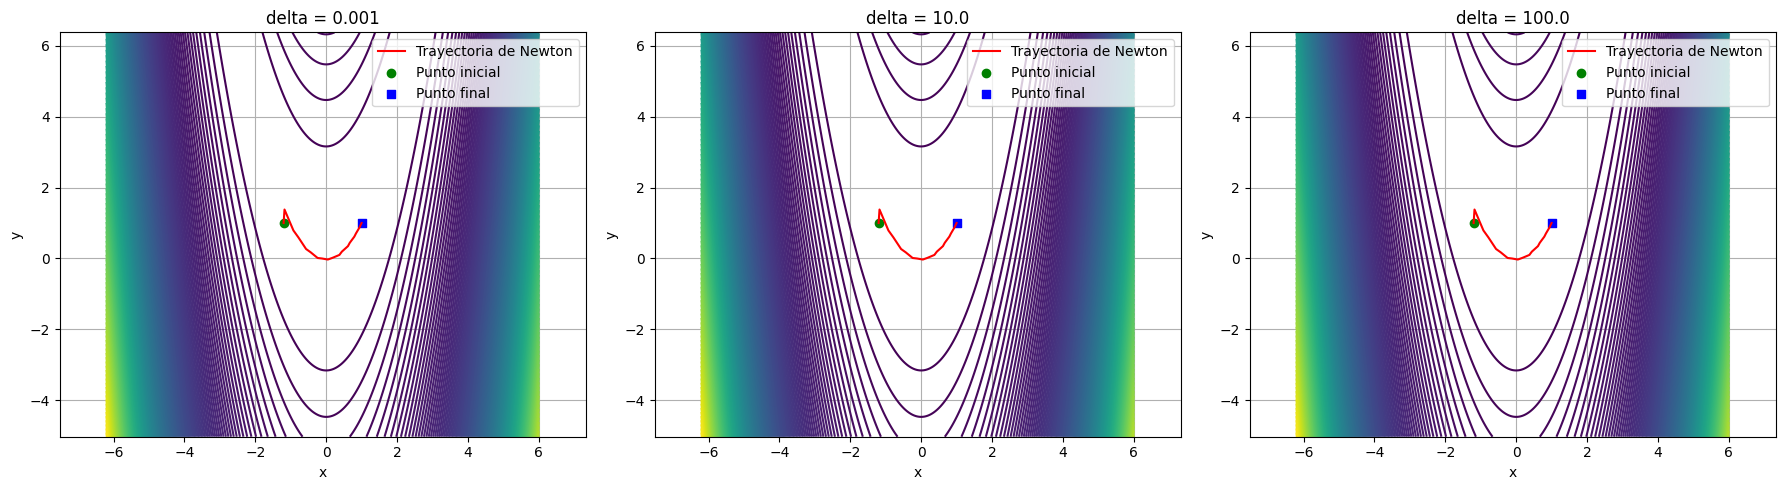

In [35]:
x0 = np.array([-1.2, 1])
xk_001, gk_001, k_001, res_001, history_001 = newton_modified(rosenbrock, rosenbrock_grad, rosenbrock_hess, x0)
xk_10, gk_10, k_10, res_10, history_10 = newton_modified(rosenbrock, rosenbrock_grad, rosenbrock_hess, x0, delta=10.0)
xk_100, gk_100, k_100, res_100, history_100 = newton_modified(rosenbrock, rosenbrock_grad, rosenbrock_hess, x0, delta=100.0)

print("-"*30)
print("delta = 0.001")
print(f"f({x0[0]},{x0[1]}) = {rosenbrock(xk_001)}")
print("k = ", k_001)
print("res = ", res_001)
print("xk = ", xk_100)
print("||g_k|| = " + str(np.linalg.norm(gk_001)))
print(f"f({xk_001[0]:.2f},{xk_001[1]:.2f}) = {rosenbrock(xk_001):.2f}")

print("-"*30)
print("delta = 10.0")
print(f"f({x0[0]},{x0[1]}) = {rosenbrock(xk_10)}")
print("k = ", k_10)
print("res = ", res_10)
print("xk = ", xk_100)
print("||g_k|| = " + str(np.linalg.norm(gk_10)))
print(f"f({xk_10[0]:.2f},{xk_10[1]:.2f}) = {rosenbrock(xk_10):.2f}")

print("-"*30)
print("delta = 100.0")
print(f"f({x0[0]},{x0[1]}) = {rosenbrock(xk_100)}")
print("k = ", k_100)
print("res = ", res_100)
print("xk = ", xk_100)
print("||g_k|| = " + str(np.linalg.norm(gk_100)))
print(f"f({xk_100[0]:.2f},{xk_100[1]:.2f}) = {rosenbrock(xk_100):.2f}")

titles = ["delta = 0.001", "delta = 10.0", "delta = 100.0"]
plot_trajectories(rosenbrock,[history_001, history_10, history_100], titles, 200, 5)

In [39]:
x0 = np.ones(200)
x0[0] = -1.2
x0[-2] = -1.2
xk_100, gk_100, k_100, res_100, history_100 = newton_modified(rosenbrock, rosenbrock_grad, rosenbrock_hess, x0, delta=100.0)

print("delta = 100.0")
print(f"f({x0[0]},{x0[1]}) = {rosenbrock(xk_100)}")
print("k = ", k_100)
print("res = ", res_100)
print("xk = ", "[", round(xk_100[0], 2), round(xk_100[1], 2), round(xk_100[2], 2), ", ...,", round(xk_100[-3], 2), round(xk_100[-2], 2), round(xk_100[-1], 2), "]")
print("||g_k|| = " + str(np.linalg.norm(gk_100)))
print(f"f({xk_100[0]:.2f},{xk_100[1]:.2f}) = {rosenbrock(xk_100):.2f}")

delta = 100.0
f(-1.2,1.0) = 3.9866238543009334
k =  15
res =  1
xk =  [ -0.99 1.0 1.0 , ..., 1.0 1.0 1.0 ]
||g_k|| = 4.650441918814107e-07
f(-0.99,1.00) = 3.99


In [38]:
x0 = np.ones(600)
x0[0] = -1.2
x0[-2] = -1.2
xk_100, gk_100, k_100, res_100, history_100 = newton_modified(rosenbrock, rosenbrock_grad, rosenbrock_hess, x0, delta=100.0)

print("delta = 100.0")
print(f"f({x0[0]},{x0[1]}) = {rosenbrock(xk_100)}")
print("k = ", k_100)
print("res = ", res_100)
print("xk = ", "[", round(xk_100[0], 2), round(xk_100[1], 2), round(xk_100[2], 2), ", ...,", round(xk_100[-3], 2), round(xk_100[-2], 2), round(xk_100[-1], 2), "]")
print("||g_k|| = " + str(np.linalg.norm(gk_100)))
print(f"f({xk_100[0]:.2f},{xk_100[1]:.2f}) = {rosenbrock(xk_100):.2f}")

delta = 100.0
f(-1.2,1.0) = 3.9866238543009334
k =  15
res =  1
xk =  [ -0.99 1.0 1.0 , ..., 1.0 1.0 1.0 ]
||g_k|| = 4.650441918814107e-07
f(-0.99,1.00) = 3.99


No parece haber un cambio significativo en la convergencia de los algoritmos; asimismo, no parece haber una sensibilidad notable al valor de $\delta$, siendo que las trayectorias descritas por los algoritmos son muy similares en cada caso.